In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
from json import dump

In [2]:
tau, ss_err = [], []

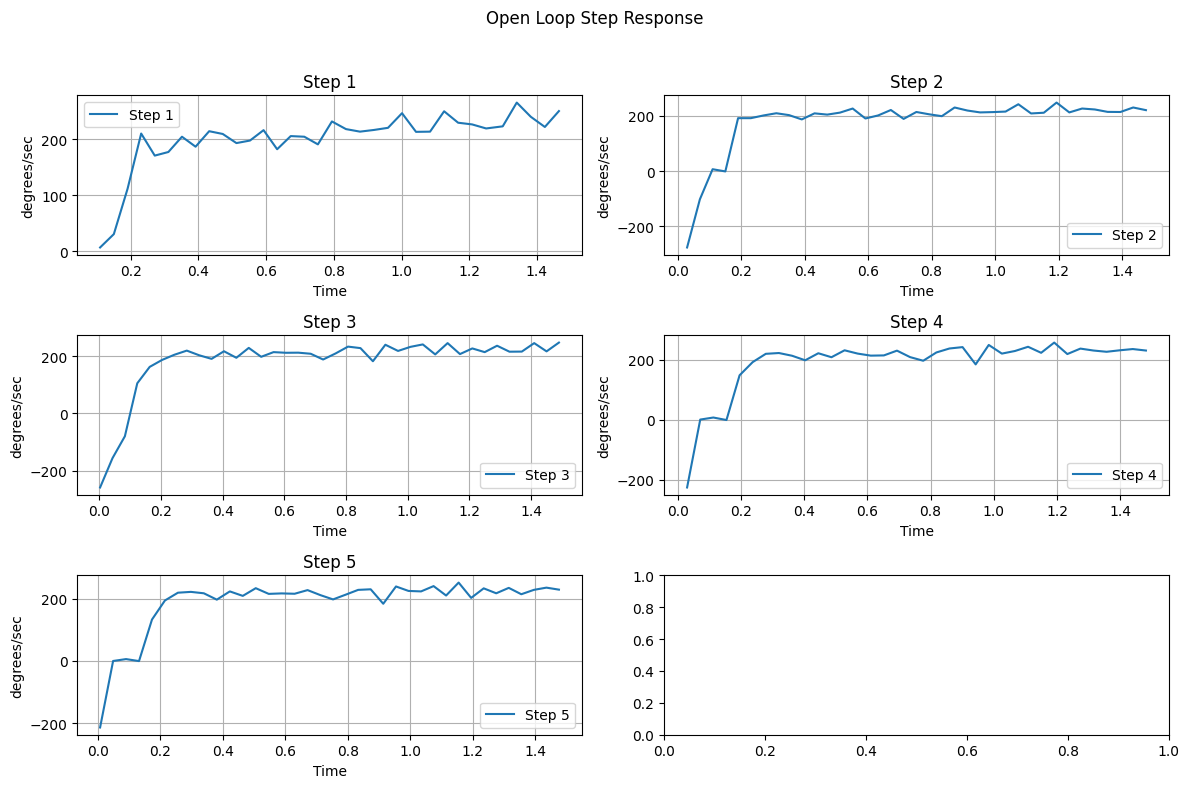

In [3]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
fig.suptitle('Open Loop Step Response')

for i in range(1, 6):
    file_path = f'/home/nikolas/Documents/GitHub/Controller/logs/pan/{i}_step_open_loop PAN.csv'
    df = pd.read_csv(file_path).query("Tempo <= 1.5")
    row, col = divmod(i-1, 2)

    ss_speed = df.query("Tempo >= 0.2 and Tempo <= 1.2").Saída.mean()
    tau.append(df.loc[df["Saída"] >= 0.63*ss_speed].iloc[0, 0])

    axs[row, col].plot(df['Tempo'], df['Saída'], label=f'Step {i}')
    axs[row, col].set_title(f'Step {i}')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('degrees/sec')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout(rect=(0, 0, 1, 0.96))

plt.show()

In [4]:
tau = np.array(tau)
print(f"Constante de tempo: {tau.mean()}s")

Constante de tempo: 0.19910298s


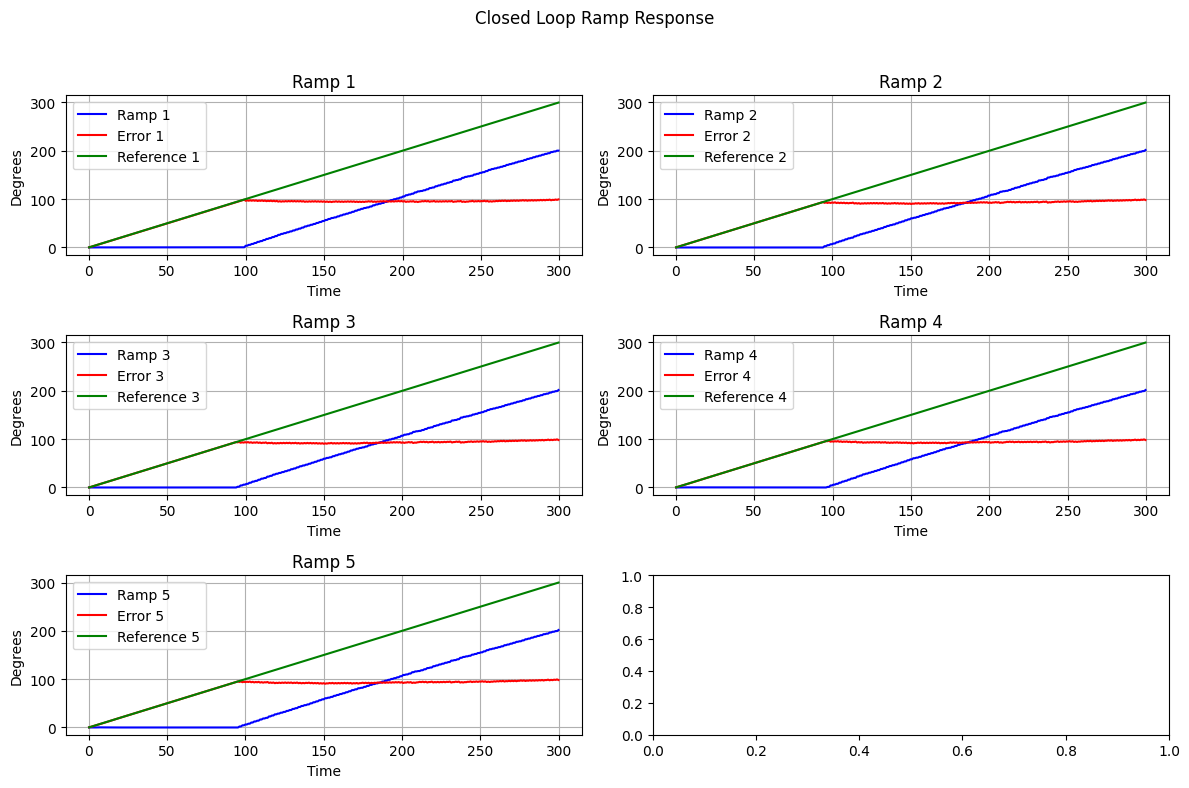

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
fig.suptitle('Closed Loop Ramp Response')

for i in range(1, 6):
    file_path = f'/home/nikolas/Documents/GitHub/Controller/logs/pan/{i}_ramp_closed_loop PAN.csv'
    df = pd.read_csv(file_path).query("Referencia <= 300")
    row, col = divmod(i-1, 2)

    ss_err.append(df.query("Referencia >= 100").Erro.mean())

    axs[row, col].plot(df['Referencia'], df['Saída'], c="b", label=f'Ramp {i}')
    axs[row, col].plot(df['Referencia'], df['Erro'], c="r", label=f"Error {i}")
    axs[row, col].plot(df['Referencia'], df['Referencia'], c="g", label=f"Reference {i}")
    axs[row, col].set_title(f'Ramp {i}')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Degrees')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout(rect=(0, 0, 1, 0.96))

plt.show()

In [6]:
ss_err = np.array(ss_err)
print(f"Ganho de malha aberta: {1/ss_err.mean()*60}")

Ganho de malha aberta: 0.6371118683191968


In [7]:
with open("../system_parameters/motor_pan.info", "w") as file:
    dump({
        "tau": tau.mean(),
        "K":1/ss_err.mean()*60
    }, file)

In [8]:
tau, ss_err = [], []

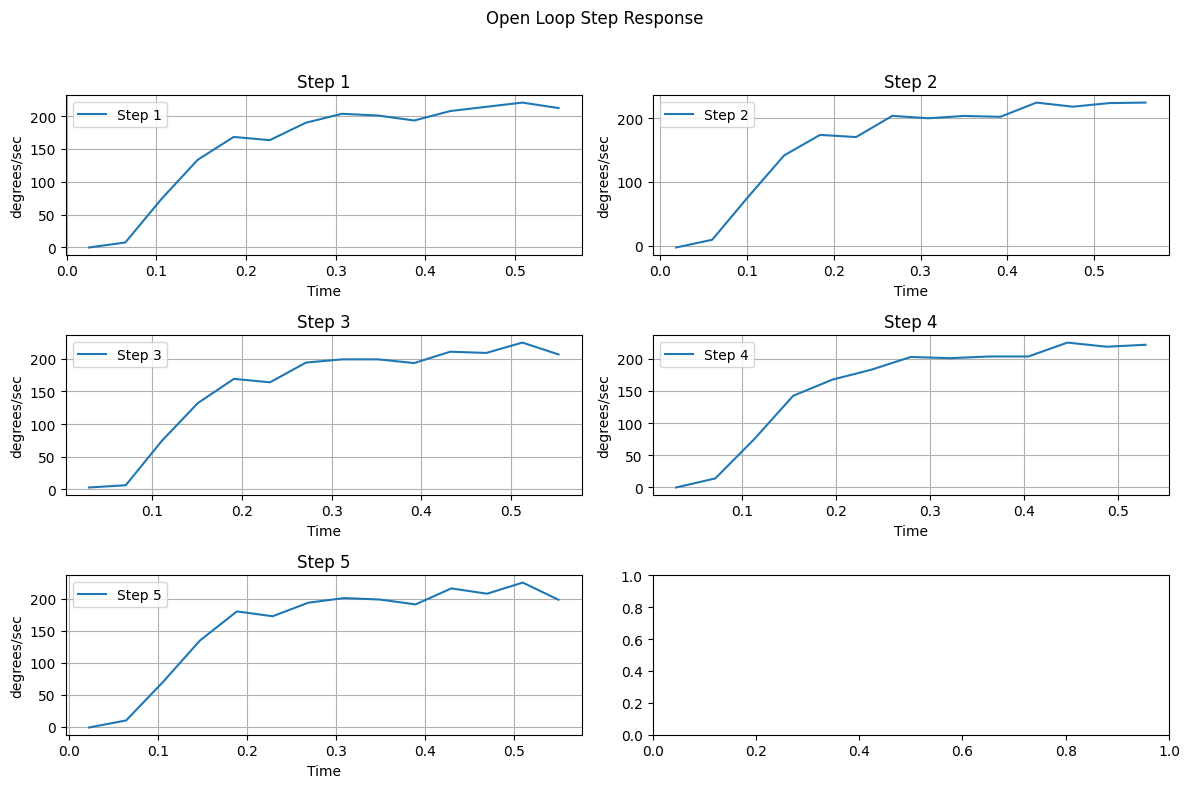

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
fig.suptitle('Open Loop Step Response')

for i in range(1, 6):
    file_path = f'/home/nikolas/Documents/GitHub/Controller/logs/tilt/{i}_step_open_loop TILT.csv'
    df = pd.read_csv(file_path).query("Tempo <= 0.57")
    row, col = divmod(i-1, 2)

    ss_speed = df.query("Tempo >= 0.3").Saída.mean()
    tau.append(df.loc[df["Saída"] >= 0.63*ss_speed].iloc[0, 0])

    axs[row, col].plot(df['Tempo'], df['Saída'], label=f'Step {i}')
    axs[row, col].set_title(f'Step {i}')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('degrees/sec')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout(rect=(0, 0, 1, 0.96))

plt.show()

In [10]:
tau = np.array(tau)
print(f"Constante de tempo: {tau.mean()}s")

Constante de tempo: 0.1484109296s


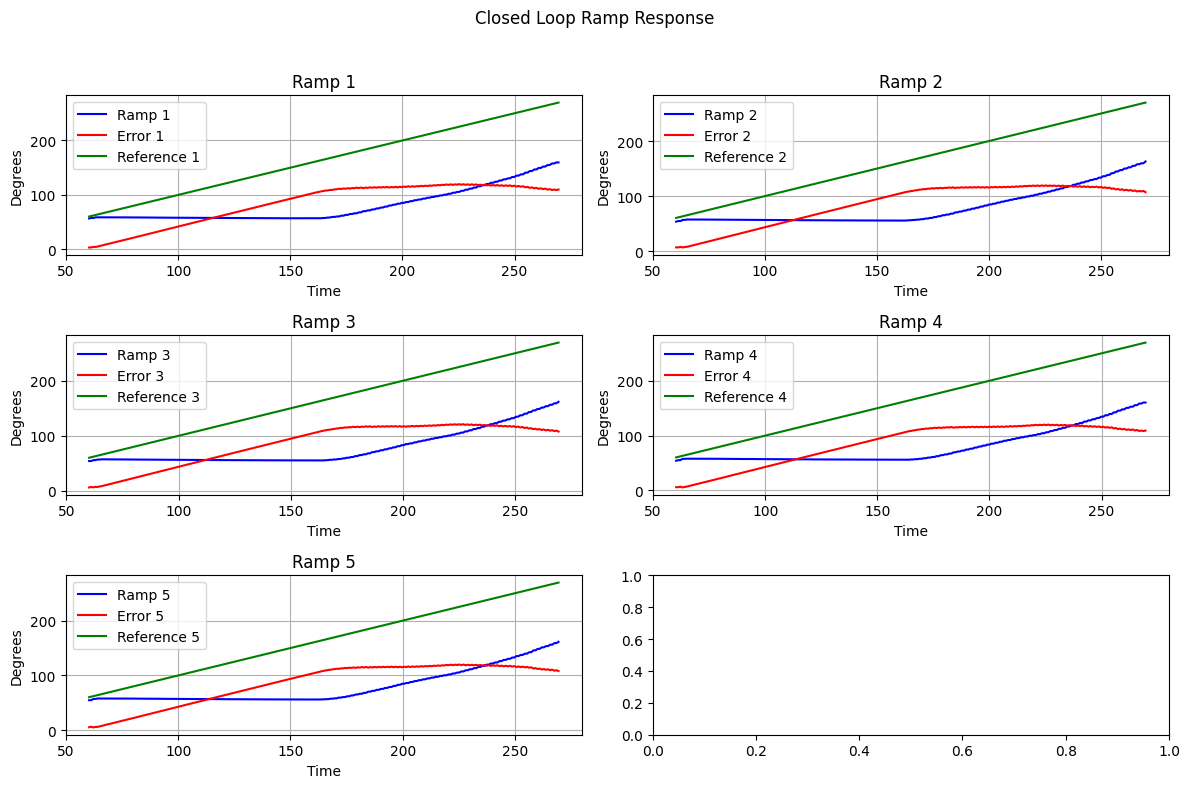

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
fig.suptitle('Closed Loop Ramp Response')

for i in range(1, 6):
    file_path = f'/home/nikolas/Documents/GitHub/Controller/logs/tilt/{i}_ramp_closed_loop TILT.csv'
    df = pd.read_csv(file_path).query("Referencia <= 270")
    row, col = divmod(i-1, 2)

    ss_err.append(df.query("Referencia >= 180 and Referencia <= 250").Erro.mean())

    axs[row, col].plot(df['Referencia'], df['Saída'], c="b", label=f'Ramp {i}')
    axs[row, col].plot(df['Referencia'], df['Erro'], c="r", label=f"Error {i}")
    axs[row, col].plot(df['Referencia'], df['Referencia'], c="g", label=f"Reference {i}")
    axs[row, col].set_title(f'Ramp {i}')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Degrees')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout(rect=(0, 0, 1, 0.96))

plt.show()

In [12]:
ss_err = np.array(ss_err)
print(f"Ganho de malha aberta: {1/ss_err.mean()*60}")

Ganho de malha aberta: 0.5120419448386376


In [13]:
with open("../system_parameters/motor_tilt.info", "w") as file:
    dump({
        "tau": tau.mean(),
        "K":1/ss_err.mean()*60
    }, file)